Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [ ]:
import pandas as pd
import numpy as np
d1 = pd.read_csv('City_bikes.csv')  
d2 = pd.read_csv('foursquare_data.csv')  
d3 = pd.read_csv('yelp_data.csv')
combined_df = pd.concat([d1, d2, d3], ignore_index=True)        #combining all databases into a single database
combined_df['Rating'] = combined_df['Rating'].replace('No rating provided', np.nan) #replace 'No rating provided' in the ratings column into a nan value.


combined_df.to_csv('combined_df.csv', index=False)
                                                      


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

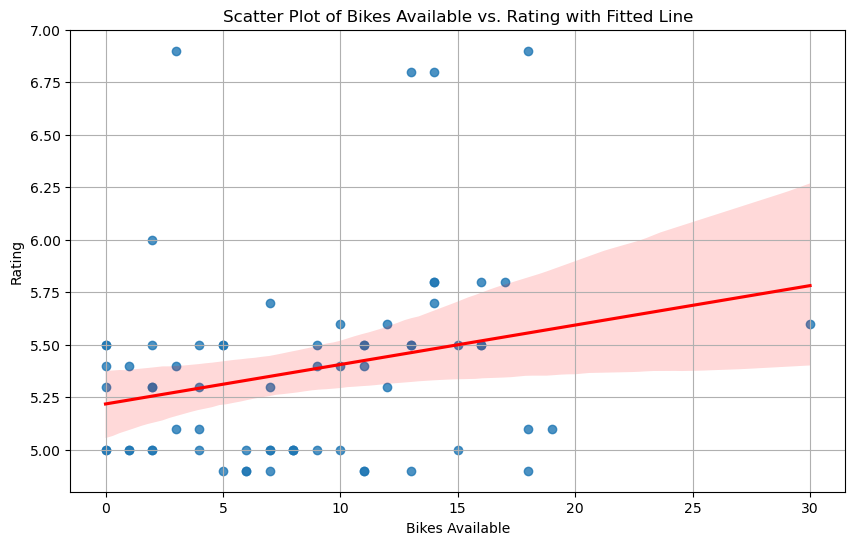

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.read_csv('combined_df.csv')
               
combined_df['Bikes Available'] = pd.to_numeric(combined_df['Bikes Available'], errors='coerce')
combined_df['Rating'] = pd.to_numeric(combined_df['Rating'], errors='coerce')


combined_df.dropna(subset=['Bikes Available', 'Rating'], inplace=True)                              # Dropping all data that does not have either Bikes available or rating.


plt.figure(figsize=(10, 6))                                                                         # Create the scatter plot with a fitted regression line to see trends.
sns.regplot(data=combined_df, x='Bikes Available', y='Rating', line_kws={'color':'red'})
plt.title('Scatter Plot of Bikes Available vs. Rating with Fitted Line')
plt.xlabel('Bikes Available')
plt.ylabel('Rating')
plt.grid()
plt.show()






Looking at the scatterplot above, the fitted regression line is slightly vertical. Indicating a  weak positive correlation between rating and bikes available. This suggests that the variation of the x-axis(bikes available) 
do not significantly affect the ratings. Which further suggests other factors from external influences.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [17]:
import pandas as pd
import sqlite3 

combined_df = pd.read_csv('combined_df.csv')

combined_df['Bikes_Available'] = combined_df['Free Bikes'].combine_first(combined_df['Bikes Available'])

combined_df = combined_df.drop(columns=['Free Bikes', 'Bikes Available'], errors='ignore')

conn = sqlite3.connect('bikes_and_pois.db')

cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS bike_stations_poi (
    id INTEGER PRIMARY KEY,
    Location TEXT,
    Latitude REAL,
    Longitude REAL,
    Station_Name TEXT,
    Station_Coordinates TEXT,
    Bikes_Available INTEGER,
    Name TEXT,
    Address TEXT,
    Rating REAL
)
''')

combined_df.to_sql('bike_stations_poi', conn, if_exists='replace', index=False)
conn.commit()
conn.close()



Look at the data before and after the join to validate your data.

In [18]:
conn = sqlite3.connect('bikes_and_pois.db')

cursor = conn.cursor()

cursor.execute("SELECT * FROM bike_stations_poi")
results = cursor.fetchall()

for row in results:
    print(row)


conn.close()

('Chilco & Barclay', 49.291909, -123.140713, '(49.291909, -123.140713)', None, None, None, None, None, 13.0)
('St George & Broadway', 49.262321, -123.09306, '(49.262321, -123.09306)', None, None, None, None, None, 0.0)
('Britannia Parking Lot', 49.275882, -123.071865, '(49.275882, -123.071865)', None, None, None, None, None, 0.0)
('Morton & Denman', 49.28803, -123.142135, '(49.28803, -123.142135)', None, None, None, None, None, 16.0)
('Thornton & National', 49.273777, -123.092723, '(49.273777, -123.092723)', None, None, None, None, None, 14.0)
('Burrard & 14th', 49.259469, -123.145718, '(49.259469, -123.145718)', None, None, None, None, None, 1.0)
('Olympic Village Station', 49.266314, -123.116011, '(49.266314, -123.116011)', None, None, None, None, None, 11.0)
('8th & Macdonald', 49.264928, -123.168068, '(49.264928, -123.168068)', None, None, None, None, None, 4.0)
('30th & Ontario', 49.243375, -123.104978, '(49.243375, -123.104978)', None, None, None, None, None, 3.0)
('Lakewood & Tr